In [1]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");


v3.0
v4.0


In [49]:
Lx, Nx, ϕa, ϕp, v0 = 100.0, 3200, 0.5, 0.3, 7.5
Z = []
ϵ = 1e-4
xs = collect(0.1:0.01:0.9)
ys = collect(0.0:0.01:0.4)

for ϕa in xs
for ϕp in ys
    try 
        sweep = (Lx, Nx, ϕa, ϕp, v0)
        f,u,c = load_full(sweep...)
        normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)
        diff_check = maximum(abs.(f - circshift(f,(-1,0))))
        param, ps = get_param_full(Lx,Nx,ϕa,ϕp,v0)
        err, erri, avmag, cep = check_u_full(u,ps);
        if (normf > ϵ)&&(err<ϵ)&&(diff_check<0.1)
            push!(Z, 1)
        else
            push!(Z, 0)
        end
    catch
        push!(Z,0)
    end
end
end

In [ ]:
#ScatteredInterpolation.jl ?

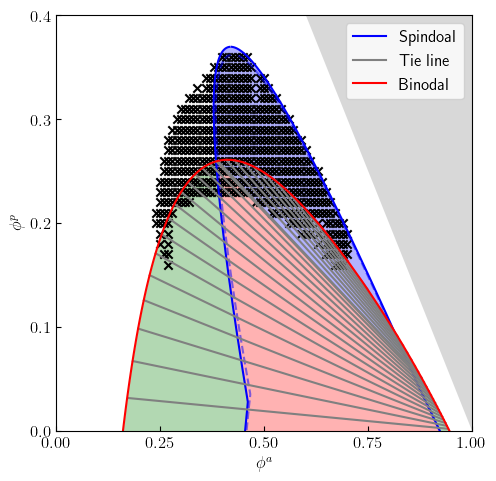

In [50]:
using PyPlot, LaTeXStrings
fig, ax = subplots(1,1,figsize=(5,5))
plot_phase(fig, ax, v0, 12; Lxs = [100])

n = length(xs)
m = length(ys)

X = collect(Iterators.flatten( xs' .* ones(m)))
Y = collect(Iterators.flatten( ones(n)' .* ys ))
Z = reshape(Z,(m,n))

# ax.contour(xs, ys, Z, [0.5])

x_coords = [x for (i,x) in enumerate(xs), (j,y) in enumerate(ys) if (Z[j,i] == 1)]
y_coords = [y for (i,x) in enumerate(xs), (j,y) in enumerate(ys) if (Z[j,i] == 1)]
ax.scatter(x_coords,y_coords; marker = "x", color = "black")

display(fig)

In [57]:
x_coords = [x for (i,x) in enumerate(xs), (j,y) in enumerate(ys) if (Z[j,i] == 1)]
y_coords = [y for (i,x) in enumerate(xs), (j,y) in enumerate(ys) if (Z[j,i] == 1)]
y_coords = [y for (i,x) in enumerate(xs), (j,y) in enumerate(ys) if (Z[j,i] == 1)]
# ϕa_min = x_coords[argmin(y_coords)]
# ϕa, ϕp = minimum(x_coords), y_coords[argmin(x_coords)]
ϕa, ϕp = maximum(x_coords), y_coords[argmax(x_coords)]
# ϕa, ϕp = x_coords[argmin(y_coords)], minimum(y_coords)
# maximum(y_coords)

(0.7, 0.17)

In [62]:
# ϕa, ϕp = 0.28, 0.3 Solver breaks down 
ϕa, ϕp = 0.27, 0.16
sweep = (Lx, Nx, ϕa, ϕp, v0)
f,u,c = load_full(sweep...)
param, ps = get_param_full(Lx,Nx,ϕa,ϕp,v0)
err, erri, avmag, cep = check_u_full(u,ps);
normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx); 
print("ϕa,ϕp=($(ϕa),$(ϕp)): cep =$(cep), normf=$(d4(normf)), err=$(err),$(erri), rho = $(sum(f)/Nx)")

# F = zeros(3*Nx+1)
# ff(F,u,ps)
# F

ϕa,ϕp=(0.27,0.16): cep =0.04913321264869685, normf=0.0519, err=5.344631939796507e-8,9574, rho = 0.43

In [11]:
input = 20

ϕa = 0.6
ϕp = d2.(collect(0.4:-0.01:0.0))[input] #41

Lx, Nx, ϕa, ϕp, v0 = 100.0, 3200, ϕa, ϕp, 7.5
# ϕa_sweep = d2.(collect(0.5:(-0.01):0.0))
ϕa_sweep = d2.(collect(ϕa:(0.01):(1-ϕp)))


f,u,c = load_full(Lx, Nx, 0.5, 0.3, v0)
no_load = true
j = length(ϕa_sweep)
ϵ = 1e-4
while (no_load)&(j>0)
    global f,u,c,ϕp,Lx,Nx,ϕa,ϕp,v0,no_load,j,dj
    try
        ϕa = ϕa_sweep[j]
        f,u,c = load_full(Lx, Nx, ϕa, ϕp, v0)
        normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)
        if normf > ϵ
            no_load = false
        else
            j -= 1
        end
    catch
        j -=1
    end
end

# ϕa_sweep = d2.(collect(ϕa:-0.01:0.0))
ϕa_sweep = d2.(collect(ϕa:0.01:(1-ϕp)))
ϕp_sweep = fill(ϕp,length(ϕa_sweep))

sweep = (Lx, Nx, ϕa, ϕp, v0)
param_sweep = [(Lx, Nx, d2(ϕa), d2(ϕp), v0) for (ϕa,ϕp) in zip(ϕa_sweep,ϕp_sweep)];
f,u,c = load_full(sweep...);

In [14]:
param, ps = get_param_full(Lx,Nx,ϕa,ϕp,v0)
err, erri, avmag, cep = check_u_full(u,ps);
normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx); 
print("ϕa,ϕp=($(ϕa),$(ϕp)): cep =$(cep), normf=$(d4(normf)), err=$(err),$(erri), rho = $(sum(f)/Nx)")

ϕa,ϕp=(0.67,0.21): cep =0.010645132845453487, normf=0.0522, err=7.248667777126627e-9,6440, rho = 0.88

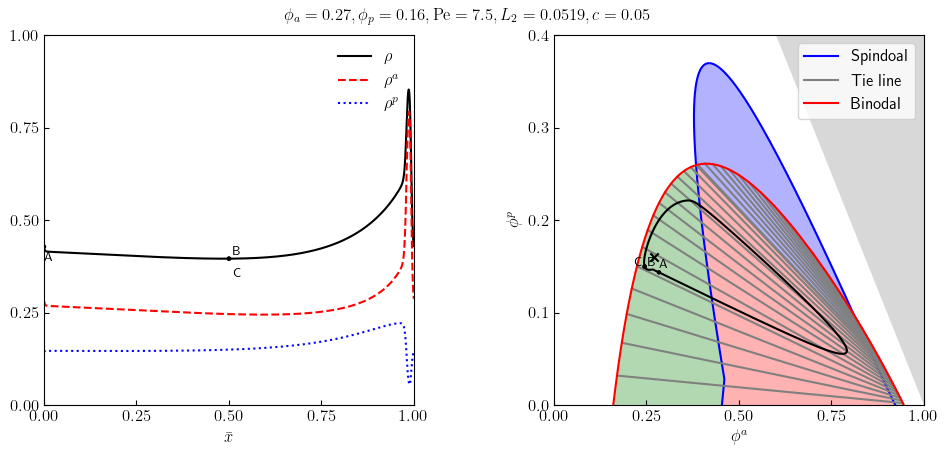

In [63]:
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f; c=c)


0.409262413831529

In [43]:
ϕa, ϕp = 0.21, 0.3
sweep = (Lx, Nx, ϕa, ϕp, v0)
f,u,c = load_full(sweep...)
param, ps = get_param_full(Lx,Nx,ϕa,ϕp,v0)
err, erri, avmag, cep = check_u_full(u,ps);
normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx); 
print("ϕa,ϕp=($(ϕa),$(ϕp)): cep =$(cep), normf=$(d4(normf)), err=$(err),$(erri), rho = $(sum(f)/Nx)")

ϕa,ϕp=(0.21,0.3): cep =0.03940310626577622, normf=0.106, err=0.07290694353687377,9601, rho = 0.5829069435368703

In [22]:
f,u,c = solve_full(Lx,Nx,ϕa,ϕp,v0,u)

InterruptException: InterruptException:

In [23]:
param, ps = get_param_full(Lx,Nx,ϕa,ϕp,v0)
err, erri, avmag, cep = check_u_full(u,ps);
print("ϕa,ϕp=($(ϕa),$(ϕp)): cep =$(cep), avmag=$(avmag), err=$(err),$(erri)")

ϕa,ϕp=(0.21,0.3): cep =0.03940310626577622, avmag=-2.733924198139448e-15, err=0.07290694353687377,9601

In [8]:
input = 35;


# v sweep 
ϕa = d2.(collect(0.2:0.01:0.9))[input] #71
ϕp = 0.3

Lx, Nx, ϕa, ϕp, v0 = 100.0, 3200, ϕa, ϕp, 7.5
ϕp_sweep = d2.(collect(0.3:(-0.01):0.0))
# ϕp_sweep = d2.(collect(0.3:(0.01):0.4))

f,u,c = load_full(Lx, Nx, 0.5, 0.3, v0)
no_load = true
j = length(ϕp_sweep)
ϵ = 1e-4
while (no_load)&(j>0)
    global f,u,c,ϕp,Lx,Nx,ϕa,ϕp,v0,no_load,j,dj
    try
        ϕp = ϕp_sweep[j]
        f,u,c = load_full(Lx, Nx, ϕa, ϕp, v0)
        normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)
        if normf > ϵ
            no_load = false
        else
            j -= 1
        end
    catch
        j -=1
    end
end

ϕp_sweep = d2.(collect(ϕp:(-0.01):0.0))
# ϕp_sweep = d2.(collect(ϕp:(0.01):0.4))
ϕa_sweep = fill(ϕa,length(ϕp_sweep))

sweep = (Lx, Nx, ϕa, ϕp, v0)
param_sweep = [(Lx, Nx, d2(ϕa), d2(ϕp), v0) for (ϕa,ϕp) in zip(ϕa_sweep,ϕp_sweep)];
println(param_sweep)


[(100.0, 3200, 0.54, 0.21, 7.5), (100.0, 3200, 0.54, 0.2, 7.5), (100.0, 3200, 0.54, 0.19, 7.5), (100.0, 3200, 0.54, 0.18, 7.5), (100.0, 3200, 0.54, 0.17, 7.5), (100.0, 3200, 0.54, 0.16, 7.5), (100.0, 3200, 0.54, 0.15, 7.5), (100.0, 3200, 0.54, 0.14, 7.5), (100.0, 3200, 0.54, 0.13, 7.5), (100.0, 3200, 0.54, 0.12, 7.5), (100.0, 3200, 0.54, 0.11, 7.5), (100.0, 3200, 0.54, 0.1, 7.5), (100.0, 3200, 0.54, 0.09, 7.5), (100.0, 3200, 0.54, 0.08, 7.5), (100.0, 3200, 0.54, 0.07, 7.5), (100.0, 3200, 0.54, 0.06, 7.5), (100.0, 3200, 0.54, 0.05, 7.5), (100.0, 3200, 0.54, 0.04, 7.5), (100.0, 3200, 0.54, 0.03, 7.5), (100.0, 3200, 0.54, 0.02, 7.5), (100.0, 3200, 0.54, 0.01, 7.5), (100.0, 3200, 0.54, 0.0, 7.5)]


In [28]:
input = 20;


# h sweep 
ϕa = 0.27
# ϕa = 0.5
ϕp = d2.(collect(0.4:-0.01:0.0))[input] #41

Lx, Nx, ϕa, ϕp, v0 = 100.0, 3200, ϕa, ϕp, 7.5
ϕa_sweep = d2.(collect(0.5:(-0.01):0.0))
# ϕa_sweep = d2.(collect(0.5:(0.01):(1-ϕp)))


f,u,c = load_full(Lx, Nx, 0.5, 0.3, v0)
no_load = true
j = length(ϕp_sweep)
ϵ = 1e-4
while (no_load)&(j>0)
    global f,u,c,ϕp,Lx,Nx,ϕa,ϕp,v0,no_load,j,dj
    try
        ϕa = ϕa_sweep[j]
        f,u,c = load_full(Lx, Nx, ϕa, ϕp, v0)
        normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)
        if normf > ϵ
            no_load = false
        else
            j -= 1
        end
    catch
        j -=1
    end
end

ϕa_sweep = d2.(collect(ϕa:-0.01:0.0))
# ϕa_sweep = d2.(collect(ϕa:0.01:(1-ϕp)))
ϕp_sweep = fill(ϕp,length(ϕa_sweep))

sweep = (Lx, Nx, ϕa, ϕp, v0)
param_sweep = [(Lx, Nx, d2(ϕa), d2(ϕp), v0) for (ϕa,ϕp) in zip(ϕa_sweep,ϕp_sweep)];
# println(param_sweep)


26-element Vector{Tuple{Float64, Int64, Float64, Float64, Float64}}:
 (100.0, 3200, 0.25, 0.21, 7.5)
 (100.0, 3200, 0.24, 0.21, 7.5)
 (100.0, 3200, 0.23, 0.21, 7.5)
 (100.0, 3200, 0.22, 0.21, 7.5)
 (100.0, 3200, 0.21, 0.21, 7.5)
 (100.0, 3200, 0.2, 0.21, 7.5)
 (100.0, 3200, 0.19, 0.21, 7.5)
 (100.0, 3200, 0.18, 0.21, 7.5)
 (100.0, 3200, 0.17, 0.21, 7.5)
 (100.0, 3200, 0.16, 0.21, 7.5)
 ⋮
 (100.0, 3200, 0.08, 0.21, 7.5)
 (100.0, 3200, 0.07, 0.21, 7.5)
 (100.0, 3200, 0.06, 0.21, 7.5)
 (100.0, 3200, 0.05, 0.21, 7.5)
 (100.0, 3200, 0.04, 0.21, 7.5)
 (100.0, 3200, 0.03, 0.21, 7.5)
 (100.0, 3200, 0.02, 0.21, 7.5)
 (100.0, 3200, 0.01, 0.21, 7.5)
 (100.0, 3200, 0.0, 0.21, 7.5)

In [44]:
input = 15

# h sweep 
ϕa = 0.5
ϕp = d2.(collect(0.4:-0.01:0.0))[input] #41

Lx, Nx, ϕa, ϕp, v0 = 100.0, 3200, ϕa, ϕp, 7.5
# ϕa_sweep = d2.(collect(0.5:(-0.01):0.0))
ϕa_sweep = d2.(collect(0.5:(0.01):(1-ϕp)))


f,u,c = load_full(Lx, Nx, 0.5, 0.3, v0)
no_load = true
j = length(ϕa_sweep)
ϵ = 1e-4
while (no_load)&(j>0)
    global f,u,c,ϕp,Lx,Nx,ϕa,ϕp,v0,no_load,j,dj
    try
        ϕa = ϕa_sweep[j]
        f,u,c = load_full(Lx, Nx, ϕa, ϕp, v0)
        normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)
        if normf > ϵ
            no_load = false
        else
            j -= 1
        end
    catch
        j -=1
    end
end

# ϕa_sweep = d2.(collect(ϕa:-0.01:0.0))
ϕa_sweep = d2.(collect(ϕa:0.01:(1-ϕp)))
ϕp_sweep = fill(ϕp,length(ϕa_sweep))

sweep = (Lx, Nx, ϕa, ϕp, v0)
param_sweep = [(Lx, Nx, d2(ϕa), d2(ϕp), v0) for (ϕa,ϕp) in zip(ϕa_sweep,ϕp_sweep)];
f,u,c = load_full(sweep...)

# for sweep in param_sweep
#     local Lx, Nx, ϕa, ϕp, v0, param
#     global f,u,c
sweep = param_sweep[2]
    try
        Lx, Nx, ϕa, ϕp, v0 = sweep
        g,uu,c = load_full(sweep...)
        ϵ = 1e-4
        normf = sqrt(sum( (g[:,1] .- ϕa/2).^2 + (g[:,2] .- ϕa/2).^2 + (g[:,3] .- ϕp).^2)/Nx)
        if normf > ϵ
            f = g
            u = uu
        else
            f,u,c = solve_full(Lx,Nx,ϕa,ϕp,v0,u)
            normf = sqrt(sum( (f[:,1] .- ϕa/2).^2 + (f[:,2] .- ϕa/2).^2 + (f[:,3] .- ϕp).^2)/Nx)
            if normf < ϵ
                # break
                print("break for loop")
            end
        end
    catch
        Lx, Nx, ϕa, ϕp, v0 = sweep
        f,u,c = solve_full(Lx,Nx,ϕa,ϕp,v0,u)
    end
# end

([0.43169423464837253 0.25342214877959846 0.13757230141903187; 0.42392697406633195 0.24811162932219358 0.14310636923587916; … ; 0.4450245618812747 0.2648719266208124 0.12714665986851326; 0.43873982740257317 0.25901727832952787 0.13224289426789892], [0.8226886848470029; 0.8151449726244047; … ; -0.17972254907304527; 0.011329931060433248;;], 0.011329931060433248)

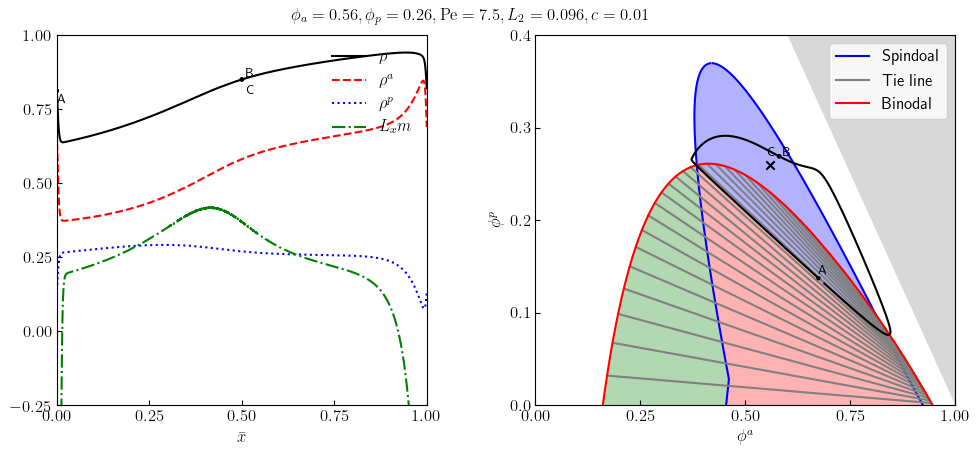

In [40]:
# f,u,c = load_full(Lx, Nx, ϕa_low, ϕp, v0)
param, ps = get_param_full(Lx, Nx, ϕa, ϕp, v0)
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f; c=c)